# Worldwide Fertility Rate

In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('seaborn')
plt.tight_layout()
plt.gca()
plt.gcf()
# plt.rcParams.update({'fontsize':14})

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Fertility Rate (1960-2020)\fertility_rate.csv")
df.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,4.86,4.78,4.67,4.54,4.41,4.29,4.16,4.04,3.94,3.84,3.77,3.71,3.66,3.63,3.59,3.56,3.54,3.50,3.46,3.40,3.32,3.25,3.16,3.07,2.99,2.92,2.86,2.82,2.78,2.75,2.72,2.70,2.67,2.64,2.62,2.61,2.59,2.58,2.57,2.55,2.53,2.52,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.46,7.46,7.46,7.46,7.46,7.46,7.47,7.48,7.50,7.54,7.57,7.61,7.63,7.63,7.61,7.56,7.49,7.39,7.27,7.15,7.02,6.88,6.72,6.56,6.37,6.18,5.98,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,5.06,4.91,4.78,4.64,4.51,4.37,4.24,4.10,3.97,3.84,3.73,3.62,3.53,3.45,3.38,3.32,3.27,3.22,3.16,3.11,3.05,2.98,2.91,2.83,2.75,2.67,2.59,2.51,2.42,2.33,2.25,2.16,2.07,1.98,1.90,1.82,1.76,1.70,1.67,1.65,1.65,1.66,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,7.66,7.64,7.62,7.60,7.56,7.51,7.43,7.34,7.23,7.11,6.96,6.79,6.62,6.43,6.24,6.04,5.84,5.63,5.41,5.19,4.96,4.73,4.48,4.22,3.96,3.70,3.45,3.21,2.99,2.80,2.64,2.51,2.44,2.40,2.41,2.44,2.50,2.57,2.65,2.73,2.80,2.86,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,7.39,7.43,7.47,7.49,7.50,7.50,7.49,7.49,7.48,7.47,7.46,7.46,7.46,7.46,7.46,7.46,7.45,7.44,7.41,7.37,7.33,7.27,7.21,7.14,7.07,6.99,6.92,6.85,6.79,6.73,6.68,6.64,6.60,6.57,6.53,6.50,6.46,6.42,6.37,6.32,6.26,6.19,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


In [63]:
df.shape

(187, 62)

In [64]:
df = pd.melt(df, id_vars=['Country'], var_name='Year',
        value_name='Fertility_Rate')
df.head()

,Country,Year,Fertility_Rate
0,_World,1960,4.98
1,Afghanistan,1960,7.45
2,Albania,1960,6.49
3,Algeria,1960,7.52
4,Angola,1960,6.71


In [65]:
df.shape

(11407, 3)

Text(0.5, 1.0, 'Fertility Rate in Algeria Between 1960 and 2020')

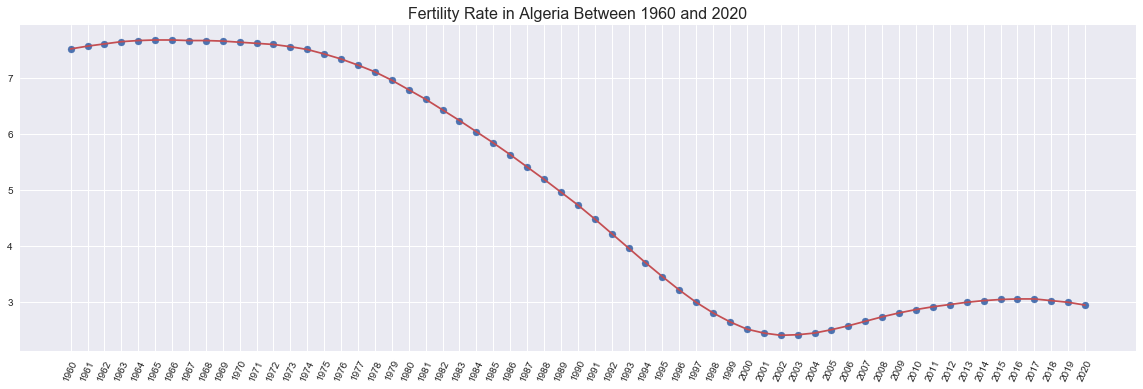

In [98]:
plt.figure(figsize = (20,6))
grp_conutry = df.groupby('Country')
grp_ke = grp_conutry.get_group('Algeria')
plt.scatter(grp_ke['Year'], grp_ke['Fertility_Rate'])
plt.plot(grp_ke['Year'], grp_ke['Fertility_Rate'], 'r')
plt.xticks(rotation = 65)
plt.title('Fertility Rate in ' + str(grp_ke['Country'].iloc[0]) + ' Between 1960 and 2020', fontdict = {'size':16})

Text(0.5, 1.0, 'Top 50 Highest Fertility Rate Worldwide in the Year 1960')

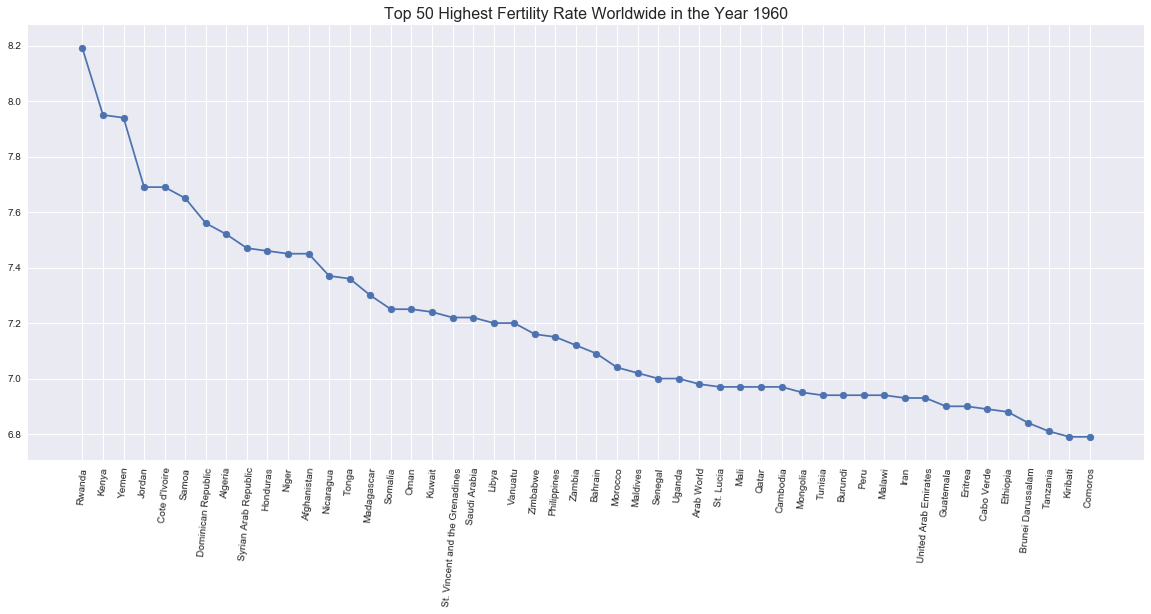

In [94]:
plt.figure(figsize = (20,8))
grp_yr = df.groupby('Year')
get_yr = grp_yr.get_group('1960').sort_values(by = 'Fertility_Rate', ascending = False)
plt.plot(get_yr['Country'].head(50), get_yr['Fertility_Rate'].head(50))
plt.scatter(get_yr['Country'].head(50), get_yr['Fertility_Rate'].head(50))
plt.xticks(rotation = 85)
plt.title('Top 50 Highest Fertility Rate Worldwide in the Year ' + str(get_yr['Year'].iloc[0]), fontdict = {'size':16})